<h1>Numeric Project</h1>
<h2>Getting the roots</h2>
<p>for getting the roots we can use many methods <br> we will use two methods <br>1-Bisection<br>2-False Position</p>


<p>first we will import the libraries we will use in this project</p>

In [3]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
print("Done")

Done


<h1> Now we will implement the functions</h1>

In [4]:
def Func(fx,x):
    x1 = ""
    x2 = ""
    x3 = ""
    equ = ""
    temp = ""
    arr1 = []
    chars = ["-","+","/"]
    chars1 = ["x"]
    chars2 = chars + chars1
    for i in range(len(fx)):
        if fx[i] == "^":
            continue
        if fx[i] not in chars2:
            if fx[i-1] == "^":
                continue
            temp = temp + fx[i]
        elif fx[i] in chars2:
            if fx[i] in chars:
                arr1.append(fx[i])
            elif fx[i] == "x":
                if fx[i+1] != "^":
                    x1 = temp 
                    temp = ""
                    equ = equ + "x1"+" "
                    continue
                if fx[i+1] == "^":
                    if fx[i+2] == "2":
                        x2 = temp 
                        temp = ""
                        equ = equ + "x2"+" "
                    elif fx[i+2] == "3":
                        x3 = temp 
                        temp = ""
                        equ = equ + "x3"+" "
        if fx[i] == fx[-1]:
            equ = equ + temp 
   
    
    ar = 0
    result = 0
    flag = 0
    #equ = equ[:-1]
    arr1 = list(arr1)
    for i in range(len(equ)):
        if equ[i] == "x" and flag == 0:
            if equ[i+1] == "1":
                result = float(x1)*x
            elif equ[i+1] == "2":
                result = float(x2)*x**2
            elif equ[i+1] == "3":
                result = float(x3)*x**3    
        elif equ[i] == "x" and flag == 1:
            if arr1[ar] == "+":
                if equ[i+1] == "2":
                    result = result + float(x2)*x**2
                    flag = 0
                    
                elif equ[i+1] == "3":
                    result = result + float(x3)*x**3
                    flag = 0
                    
                elif equ[i+1] == "1":
                    result = result + float(x1)*x
                    flag = 0
                ar = ar +1
                continue
            elif arr1[ar] == "-":
                if equ[i+1] == "2":
                    result = result - float(x2)*x**2
                    flag = 0
              
                elif equ[i+1] == "3":
                    result = result - float(x3)*x**3
                    flag = 0
                 
                elif equ[i+1] == "1":
                    result = result - float(x1)*x
                    flag = 0
                ar = ar +1
                continue
            elif arr1[ar] == "/":
                if equ[i+1] == "2":
                    result = result / float(x2)*x**2
                    flag = 0
                    
                if equ[i+1] == "3":
                    result = result / float(x3)*x**3
                    flag = 0
                    
                if equ[i+1] == "1":
                    result = result / float(x1)*x
                    flag = 0
                ar = ar +1
                continue
             
        elif equ[i] == " ":
            flag = 1
            continue
        elif equ[i] != "x" and flag == 1:
            if arr1[ar] == "+":
                result = result + float(equ[i:])
            elif arr1[ar] == "-":
                result = result - float(equ[i:])
            elif arr1[ar] == "/":
                result = result / float(equ[i:])    
            break
        
    return result        
    
        

<h3>Now we will implement the function of the Bisection method that will take the function of X and determine if it is valid or not and if it is valid it will determine the root of that function</h3>

In [9]:
def Bisection(fx,x1,x2,error):
    Valid = False
    V = Func(fx,x1)*Func(fx,x2)
    if V < 0:
        Valid = True
        print("we can get the root of this function")
    else:
        return "we can not get the root of this function"
    
    x3 = (x2 + x1)/2
    err = (x2 - x1)/2
    Iterations = [1]
    X1 =  [x1]
    X2 =  [x2]
    X3 =  [x3]    
    FX1 = [Func(fx,x1)]
    FX2 =  [Func(fx,x2)]
    FX3 =  [Func(fx,x3)]
    ERROR = [err]
    while ERROR[-1] >= error:
        Iterations.append(Iterations[-1] + 1)
        if (Func(fx,X1[-1])*Func(fx,X3[-1])) < 0 :
            X2.append(X3[-1])
            X1.append(X1[-1])
            FX2.append(FX3[-1])
            FX1.append(FX1[-1])
        elif (Func(fx,X1[-1])*Func(fx,X3[-1])) > 0 :
            X2.append(X2[-1])
            X1.append(X3[-1])
            FX2.append(FX2[-1])
            FX1.append(FX3[-1])
        
        X3.append((X2[-1] + X1[-1])/2)
        FX3.append(Func(fx,X3[-1]))
        ERROR.append((X2[-1] - X1[-1])/2)
    
    df = pd.DataFrame({'Iterations':Iterations,'X1':X1,'X3':X3,'X2':X2,'FX1':FX1,'FX3':FX3,'FX2':FX2,'ERROR':ERROR})
    print("the last value of X3 is",X3[-1])
    a = [1,2,3,4,5,6]
    zero = [0]
    plt.xlim(4.0, 4.3), plt.ylim(-0.5, 0.5)
    plt.plot(X3,FX3, marker = 'o')
    plt.axhline(y=0.0,color = "red")
    plt.show()
    return df     

<p>so now we will give the method our function of x and the two guesses and the error</p>

we can get the root of this function
the last value of X3 is 4.24609375


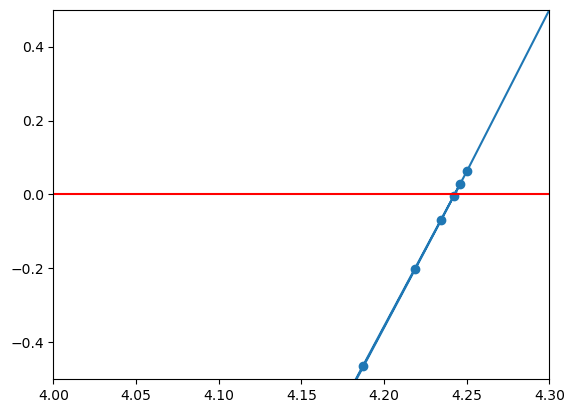

,Iterations,X1,X3,X2,FX1,FX3,FX2,ERROR
0,1,4.000000,4.500000,5.00,-2.000000,2.250000,7.0000,0.500000
1,2,4.000000,4.250000,4.50,-2.000000,0.062500,2.2500,0.250000
2,3,4.000000,4.125000,4.25,-2.000000,-0.984375,0.0625,0.125000
3,4,4.125000,4.187500,4.25,-0.984375,-0.464844,0.0625,0.062500
4,5,4.187500,4.218750,4.25,-0.464844,-0.202148,0.0625,0.031250
5,6,4.218750,4.234375,4.25,-0.202148,-0.070068,0.0625,0.015625
6,7,4.234375,4.242188,4.25,-0.070068,-0.003845,0.0625,0.007812
7,8,4.242188,4.246094,4.25,-0.003845,0.029312,0.0625,0.003906


In [10]:
fx = "4x^3-6x^2+7x-2.3"
fx1 = "1x^2-18"
Bisection(fx1,4,5,0.005)

In [9]:
fx2 = input("plz enter the function of x")
x1 = eval(input("plz enter the first guess"))
x2 = eval(input("plz enter the second guess"))
error = eval(input("plz enter the error"))
Bisection(fx2,x1,x2,error)

plz enter the function of x4x^3-6x^2+7x-2.3
plz enter the first guess0
plz enter the second guess1
plz enter the error0.05
we can get the root of this function
the last value of X3 is 0.46875


,Iterations,X1,X3,X2,FX1,FX3,FX2,ERROR
0,1,0.0000,0.50000,1.0,-2.300000,0.200000,2.7,0.50000
1,2,0.0000,0.25000,0.5,-2.300000,-0.862500,0.2,0.25000
2,3,0.2500,0.37500,0.5,-0.862500,-0.307812,0.2,0.12500
3,4,0.3750,0.43750,0.5,-0.307812,-0.050977,0.2,0.06250
4,5,0.4375,0.46875,0.5,-0.050977,0.074878,0.2,0.03125
